## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:因为机器学习是从大量已知数据中创建一个公式。相比于一个复杂但可能无法应用到问题中的公式，是更有依据的。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:随机性特别大，取得更优的k，b，取决于随机函数的‘心情’

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:是的。缺点是迭代次数多，目的性较弱，本质也是随机尝试某个方向

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:因为梯度是具有方向的，且负梯度是沿着x的负方向下降，直至收敛于一点。目的性强，总能找到一个极小值使得损失函数较小

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度是多维空间中的导数。沿着导数的负方向，即为下降

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:收敛快，且总能有一个最优解使得loss函数最小

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:用已有的数据量，生产一个函数，解决相应的问题

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [ ]:
import requests

def make_session(is_proxy=False):

    session = requests.session()
    session.verify = False
    session.trust_env = False
    session.headers = {
        'Connection': 'keep-alive',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        # 'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'zh-CN,zh;q=0.9'
    }
    if is_proxy:
        session.proxies = {
            'http': '127.0.0.1:8888',
            'https': '127.0.0.1:8888',
        }

    return session

In [ ]:
import requests
import re
from lxml import etree
from bs4 import BeautifulSoup
import json
from spider.requests_helper import make_session


class baike_sp:

    def __init__(self):
        self.session = make_session(True)
        self.deal_subway_url = []
        self.data = {}

    def visit_first(self):
        url = 'https://baike.baidu.com/'
        response = self.session.get(url)
        response.encoding = 'utf-8'
        # print(response.status_code)
        # print(response.text)

    def visit_seach(self):
        url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E8%BD%A6%E7%AB%99%E5%88%97%E8%A1%A8'
        response = self.session.get(url)
        # print(response.status_code)
        response.encoding = 'utf-8'
        self.txt = response.text

        # soup = BeautifulSoup(self.txt,'lxml')
        # print(soup.prettify())

        # print(self.txt)

    # def seach_all_route(self):
    #     # soup = BeautifulSoup(self.txt, 'lxml')
    #     part_txt = re.search(r'线路号(.*?)QKZ5', self.txt).group()
    #
    #     all_subway = re.findall(r'<a.*?href="(.*?)">',part_txt)
    #     # print(len(all_subway))
    #     for subway in all_subway:
    #         url = 'https://baike.baidu.com'+subway
    #         self.deal_subway_url.append(url)

    # def get_info(self):
    #     for url in self.deal_subway_url:
    #         response = self.session.get(url)
    #         response.encoding = 'utf-8'
    #         subway_txt = response.text

    def get_subway(self):

        tree = etree.HTML(self.txt)
        routes = list(tree.xpath('//li[@class="level2"]/span[@class="text"]/a/text()'))

        for i, route in enumerate(routes):
            subway_one = tree.xpath('//table[{}]//a/text()'.format(i+1))
            for station in subway_one[:]:
                if '站' not in station:
                    subway_one.remove(station)

            self.data[route] = subway_one
        # print(self.data)

    def write_file(self):
        with open('e:/data.txt','wt') as f:
            json.dump(self.data,f)
        print('ok')


if __name__ == '__main__':
    bk = baike_sp()
    bk.visit_first()
    bk.visit_seach()
    bk.get_subway()
    bk.write_file()

In [1]:
import json
from collections import defaultdict
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
with open('E:\data.txt','rt') as f:
    data = json.load(f)
# data

In [4]:
# import re
# partten = re.compile(r'(\w+),(\d+.\d+),(\d+.\d+)')
# position = {}
# for i, line in enumerate(open('E:\change.txt',encoding='utf-8')):
#     name,long,lat= partten.findall(line)[0]
    
#     position[name+'站'] = (float(long),float(lat))


In [5]:
# position

{'苹果园站': (39.9263251384, 116.1777806282),
 '古城站': (39.9072014648, 116.1902475357),
 '八角游乐园站': (39.9074319023, 116.2128210068),
 '八宝山站': (39.9072673042, 116.2358236313),
 '玉泉路站': (39.9073331435, 116.2530326843),
 '五棵松站': (39.9078269362, 116.2740182877),
 '万寿路站': (39.9074319023, 116.2951755524),
 '公主坟站': (39.9074319023, 116.3097667694),
 '军事博物馆站': (39.9074648219, 116.3240146637),
 '木樨地站': (39.9076294195, 116.3374471664),
 '南礼士路站': (39.9072014648, 116.352596283),
 '复兴门站': (39.9071685451, 116.3565444946),
 '西单站': (39.9074319023, 116.3742685318),
 '天安门西站': (39.9074648219, 116.3917350769),
 '天安门东站': (39.9077281779, 116.4016485214),
 '王府井站': (39.9080244523, 116.4115619659),
 '东单站': (39.9081890486, 116.4179134369),
 '建国门站': (39.90851824, 116.4358091354),
 '永安里站': (39.9083865636, 116.4504861832),
 '国贸站': (39.9091436994, 116.4619016647),
 '大望路站': (39.90851824, 116.4770936966),
 '四惠站': (39.9087157541, 116.4954614639),
 '四惠东站': (39.90851824, 116.5153312683),
 '北京站': (39.9049628889, 116.4272689819)

In [6]:
connection_station = defaultdict(list)
for k, stations in data.items():
    for i, station in enumerate(stations):
        if i == 0 and station!='双岛式站台':
            connection_station[station].append(stations[i+1])
        elif i+1 == len(stations) and station!='双岛式站台':
            connection_station[station].append(stations[i-1])
        elif station!='双岛式站台':
            connection_station[station].extend([stations[i-1], stations[i+1]])

In [7]:
connection_station

defaultdict(list,
            {'苹果园站': ['古城站'],
             '古城站': ['苹果园站', '八角游乐园站'],
             '八角游乐园站': ['古城站', '八宝山站'],
             '八宝山站': ['八角游乐园站', '玉泉路站'],
             '玉泉路站': ['八宝山站', '五棵松站'],
             '五棵松站': ['玉泉路站', '万寿路站'],
             '万寿路站': ['五棵松站', '公主坟站'],
             '公主坟站': ['万寿路站', '军事博物馆站', '莲花桥站', '西钓鱼台站'],
             '军事博物馆站': ['公主坟站', '木樨地站', '白堆子站', '北京西站'],
             '木樨地站': ['军事博物馆站', '南礼士路站'],
             '南礼士路站': ['木樨地站', '复兴门站'],
             '复兴门站': ['南礼士路站', '西单站', '长椿街站', '阜成门站'],
             '西单站': ['复兴门站', '天安门西站', '灵境胡同站', '宣武门站'],
             '天安门西站': ['西单站', '天安门东站'],
             '天安门东站': ['天安门西站', '王府井站'],
             '王府井站': ['天安门东站', '东单站'],
             '东单站': ['王府井站', '建国门站', '崇文门站', '灯市口站'],
             '建国门站': ['东单站', '永安里站', '朝阳门站', '北京站'],
             '永安里站': ['建国门站', '国贸站'],
             '国贸站': ['永安里站', '大望路站', '金台夕照站', '双井站'],
             '大望路站': ['国贸站', '四惠站', '九龙山站', '金台路站'],
             '四惠站': ['大望路站', '四惠东站

NetworkXError: Node '物资学院路站' has no position.

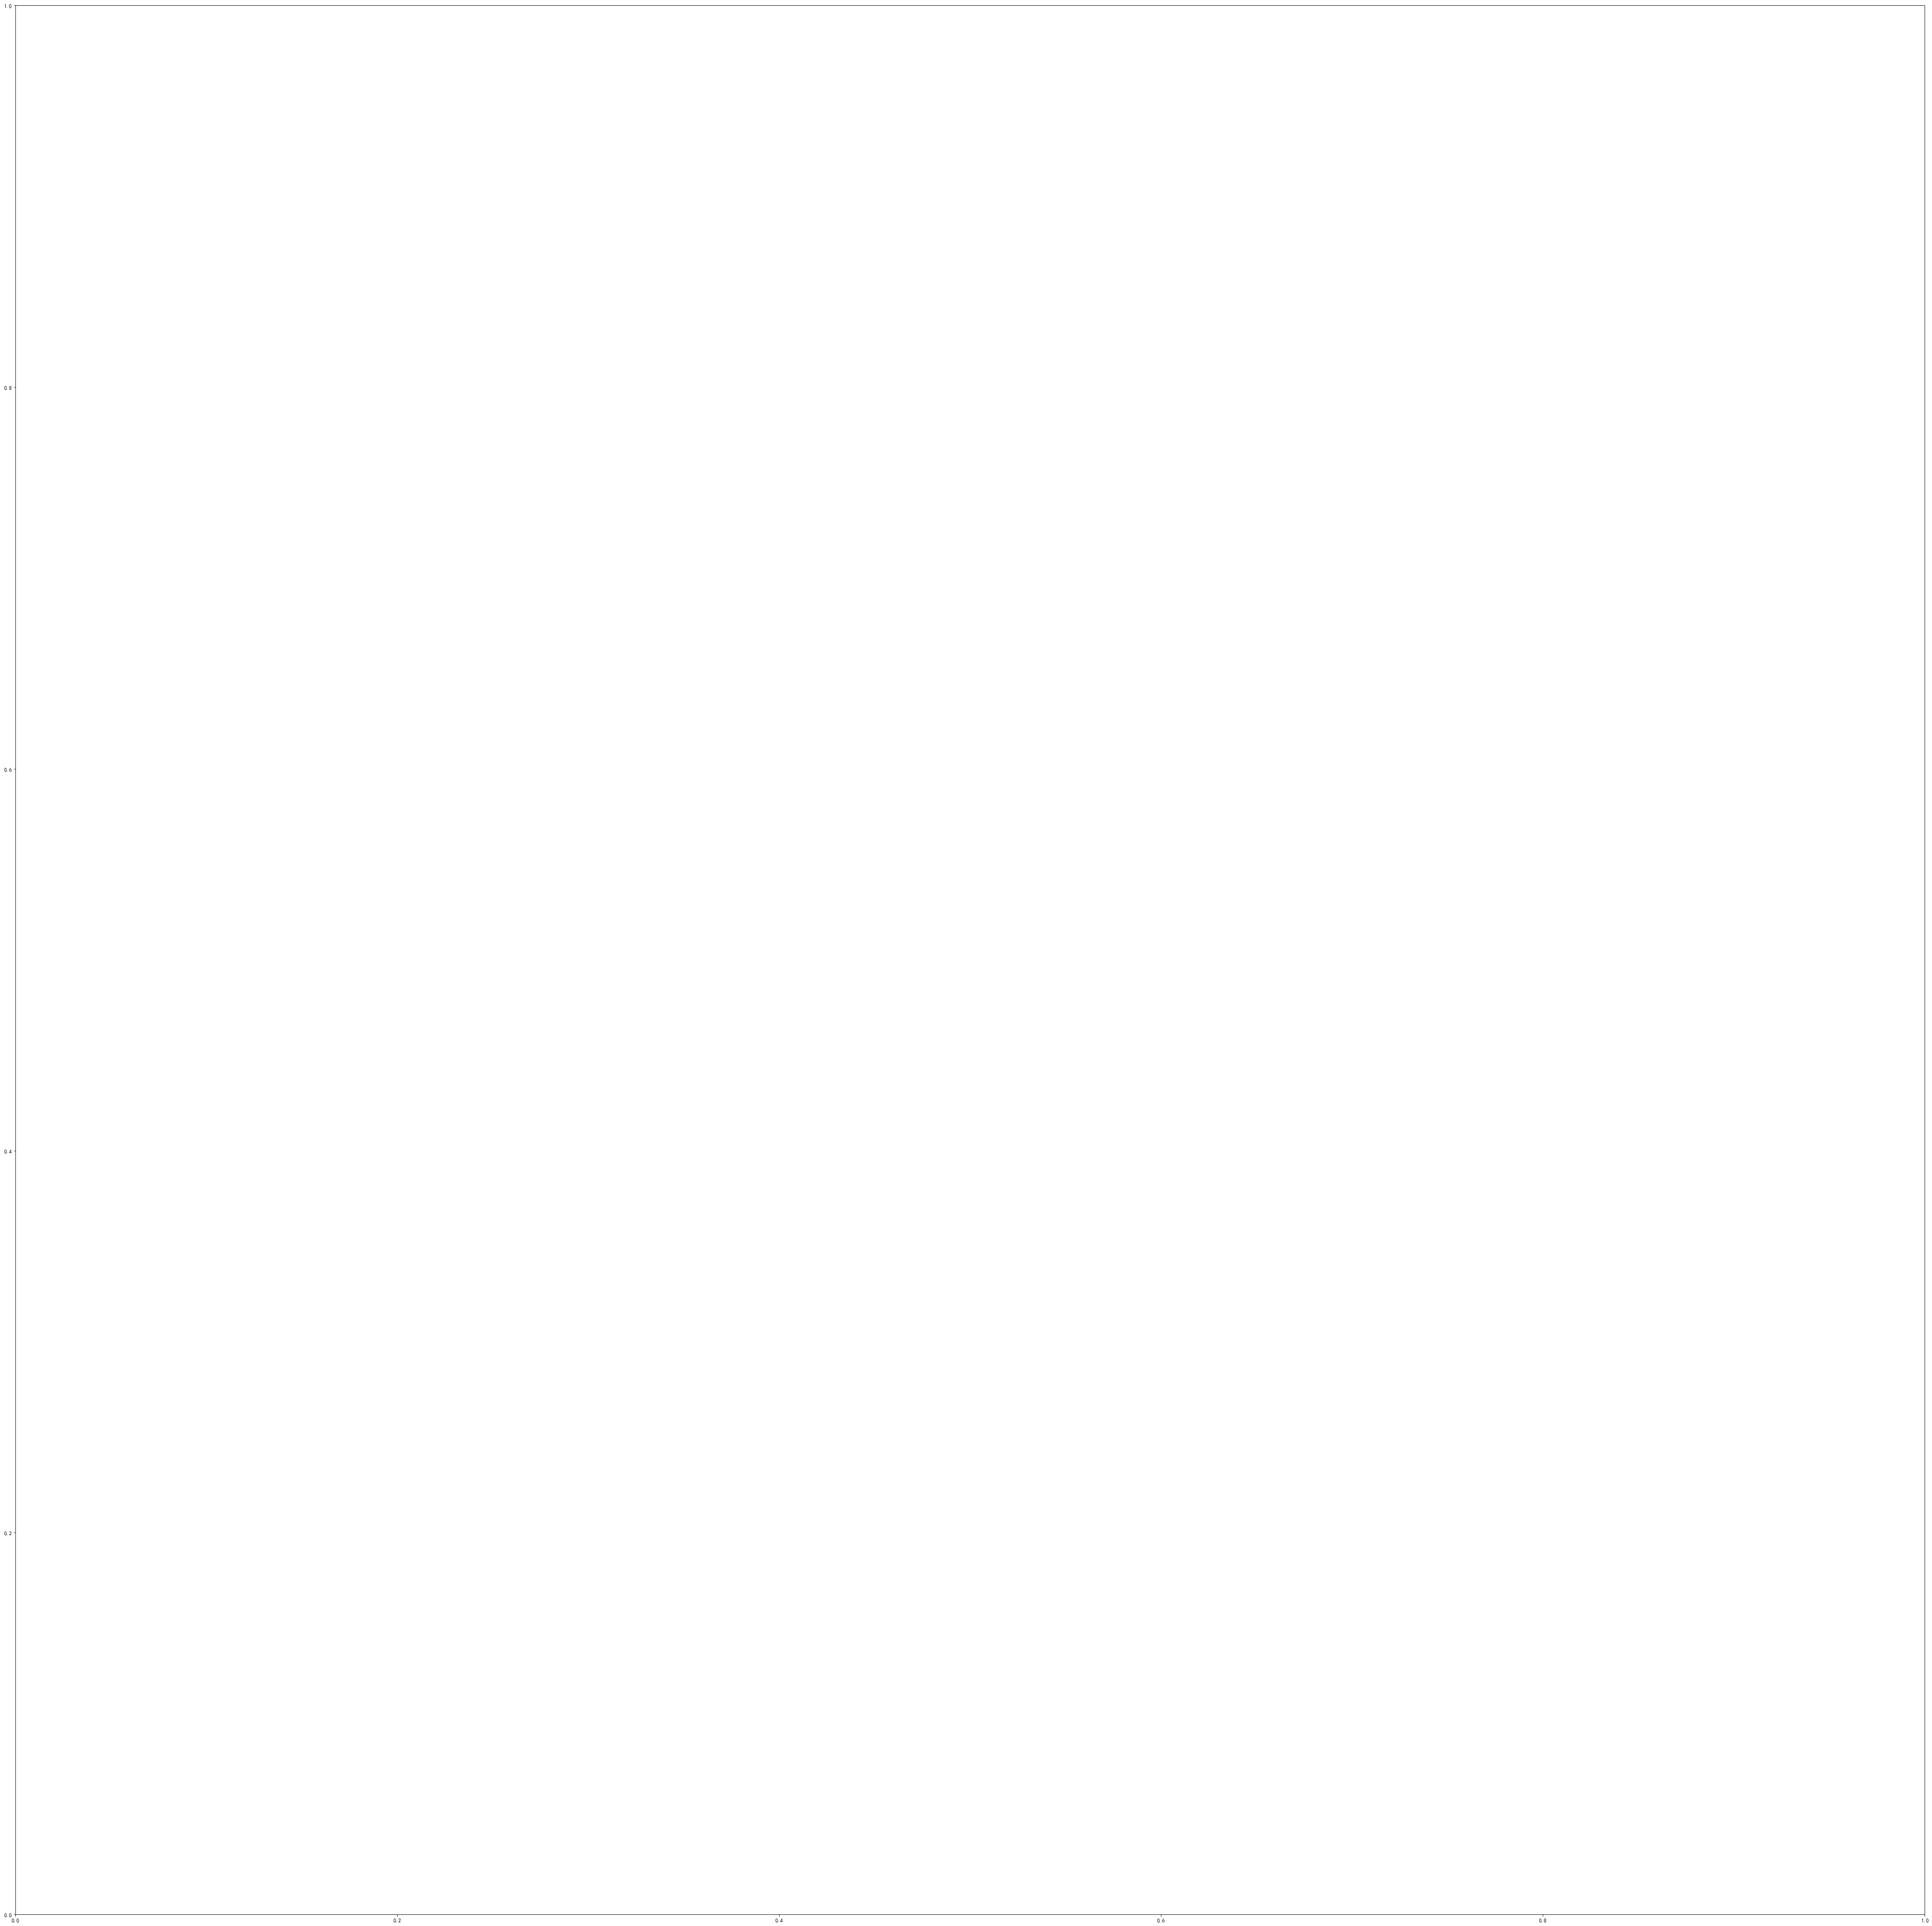

In [8]:
station_with_graph = nx.Graph(connection_station)
plt.figure(figsize=(50,50))
nx.draw(station_with_graph, with_labels = True, node_size = 30,font_size =35,)

In [ ]:
def search(start, destnation, connection_graph):
    pathes = [[start]]
    
    data = []
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        successors = connection_graph[froninter]
        
        for city in successors:
            
            if city not in path:
            
                new_path = path + [city]

                pathes.append(new_path)

                if city == destnation: 
                    data.append(new_path)
    
    return data
        
     

In [ ]:
def sone(start,end,graph):
    pathes = [[start]]
    
    visited = set()
    
    while pathes:
        path = pathes.pop()
        froninter = path[-1]
        
        if froninter in visited: continue
        
        successor = graph[froninter]
        
        for station in successor:
            if station in visited: continue
            
            new_path = path + [station]
#             print(new_path)
            pathes.append(new_path)
            
            if station == end:
                return new_path
        
        visited.add(froninter)
        
    

In [ ]:
search('苏庄站','良乡大学城站',connection_station)

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)